<a href="https://colab.research.google.com/github/saadakhtar312/IJMST_project/blob/main/Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime, os

In [227]:
## Mount the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [228]:
## Import the csv file 
DATADIR = r"drive/My Drive/Finances"
file_name = "pcbanking_July2_2019_To_June21_2021.csv"
path = os.path.join(DATADIR,file_name)
df = pd.read_csv(path, header = None)

In [229]:
# create columns and pre-process the csv file

df.columns = ['Date','Amount','2','Type','Details']
df['Withdrawl'] = 0.0
df['Deposit'] = 0.0
df.drop(['2'], axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df['Date']) # convert to datetime format

In [230]:
# Create an iterator for separating withdrawls from deposits

for (columnName, columnData) in df.iteritems():
  if columnName == 'Amount':
    series = columnData

In [231]:
# Separates withrawls and deposits from each entry

for index, val in enumerate(series):
  if val < 0:
    df['Withdrawl'][index] = val
    # print(df['Withdrawl'][index],val)
    df['Deposit'][index] = 0
  if val > 0 :
    df['Withdrawl'][index] = 0
    df['Deposit'][index] = val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Se

In [232]:
# Group by Year 

per_year = df.Date.dt.to_period("Y")
g_year = df.groupby(per_year)
df_Yearly = g_year.sum() # Save the sum of monthly frequency in a separate dataframe
df_Yearly.reset_index(inplace = True) # reset index

In [233]:
# Group by Month 

per = df.Date.dt.to_period("M")
g = df.groupby(per)
df_Monthly = g.sum() # Save the sum of monthly frequency in a separate dataframe
df_Monthly.reset_index(inplace = True) # reset index

In [234]:
# Group by Day

per_day = df.Date.dt.to_period("D")
g_day = df.groupby(per_day)
df_Daily = g_day.sum()

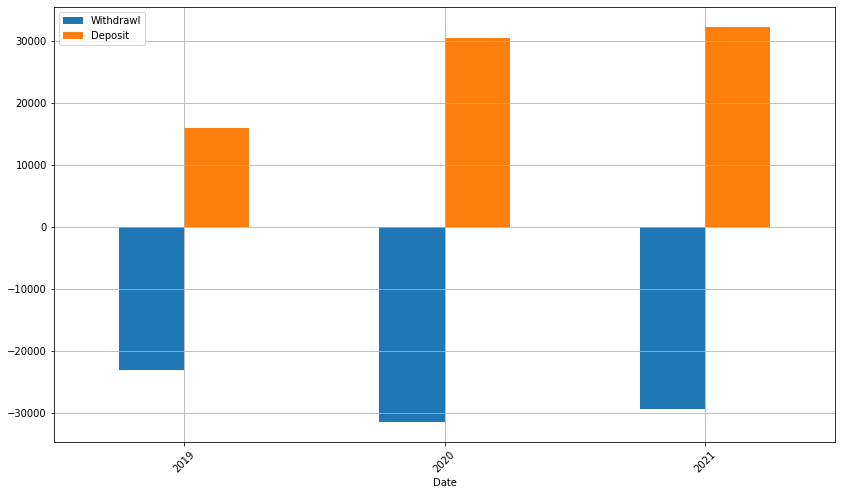

In [235]:
# Plotting by Year

df_Yearly.plot('Date',['Withdrawl','Deposit'], kind ='bar', 
                figsize = (14,8), rot = '45', grid = True)

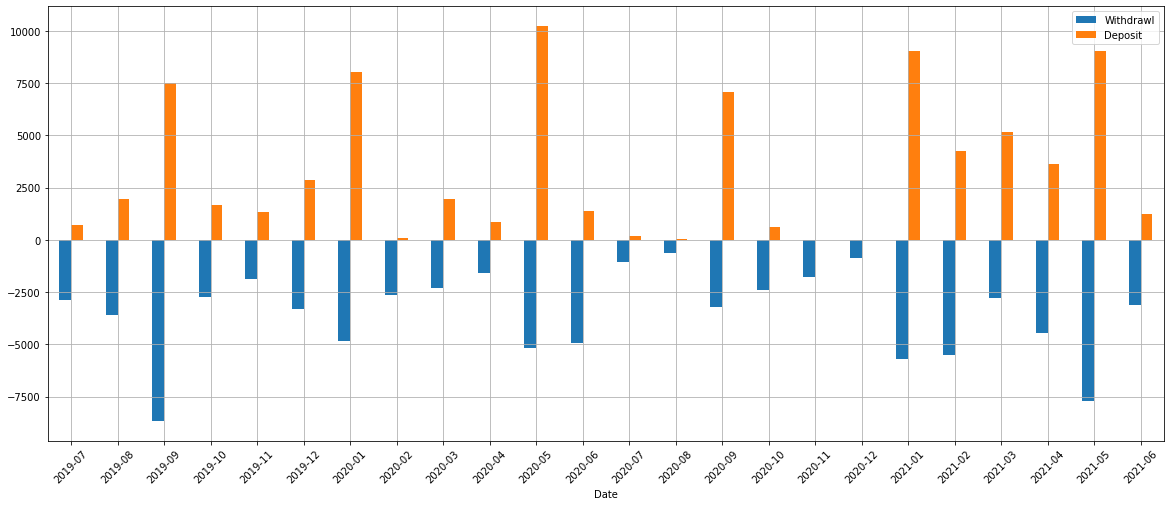

In [236]:
# Plotting by Month

df_Monthly.plot('Date',['Withdrawl','Deposit'], kind ='bar', 
                figsize = (20,8), rot = '45', grid = True)

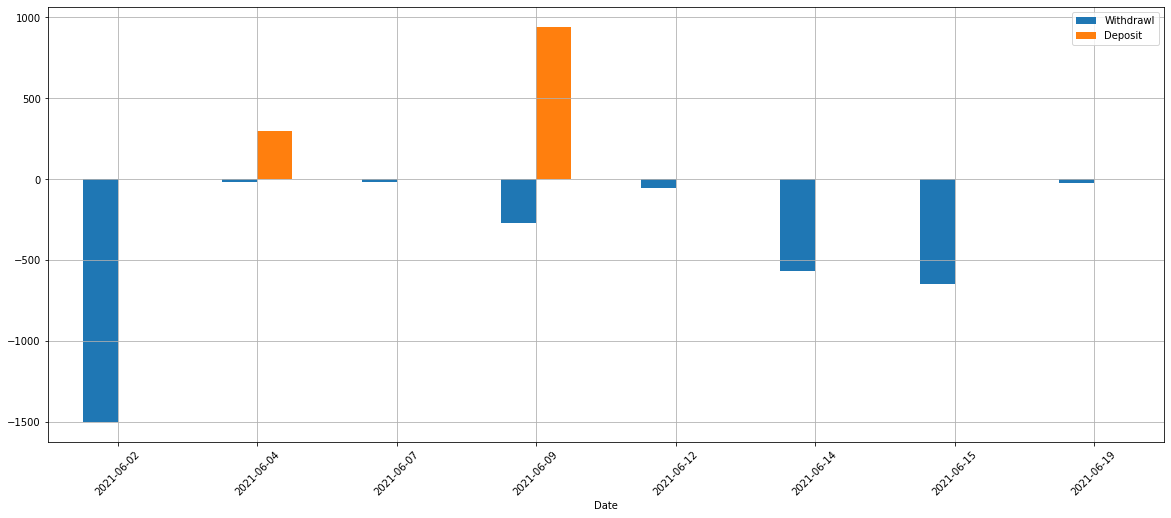

In [237]:
## Plot by Day of a particular month and year
Month = '06'
Year = '2021'
Filter = Year + '-' + Month
df_Daily.filter(like = Filter, axis = 0).reset_index().plot(x = 'Date', 
                                                         y = ['Withdrawl','Deposit'], 
                                                         kind ='bar', figsize = (20,8),
                                                         rot = '45', grid = True)

In [238]:
df2.filter(like = '2021', axis = 0).reset_index()

,Date,Amount,Withdrawl,Deposit
0,2021-01-04,-80.00,-80.00,0.00
1,2021-01-05,500.00,-700.00,1200.00
2,2021-01-11,100.00,0.00,100.00
3,2021-01-14,-222.67,-222.67,0.00
4,2021-01-15,6724.00,-276.00,7000.00
...,...,...,...,...
61,2021-06-09,672.39,-270.00,942.39
62,2021-06-12,-57.63,-57.63,0.00
63,2021-06-14,-566.96,-566.96,0.00
64,2021-06-15,-648.00,-648.00,0.00


## What this code does

* Imports my banking transaction data from July 2019 - Jun 2021 (Past 2 years)

* Can sort the data date-wise (Monthly, Daily, or yearly frequency)

* Can plot withrawl vs. deposits monthwise, daywise, and yearly

## What I want it to do

* Zoom in on the withdrawls and deposits in a bit more detail

* Separate investments from the withdrawls and have their own bar

* Categorize withdrawls into remittances, monthly expenditure (grocery, eating out, trips, transportation etc., amazon stuff, other random things etc.)

* Categorize deposits source-wise. Like main income, side jobs, tax refunds etc.